# Spam message classification using keras tensorflow

### Import the neccessary library

In [43]:
import pandas as pd 
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Flatten
import matplotlib.pyplot as plt
%matplotlib inline

### Import the dataset

In [25]:
message = pd.read_csv("data/spam.csv", encoding = "latin-1")
message.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [26]:
message.shape

(5572, 5)

### Clean the data

In [27]:
# select the required columns
message = message[["v1","v2"]]
message.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
# check for null value
message.isna().sum()

labels    0
text      0
dtype: int64

In [32]:
# rename the columns
message.rename(columns={"v1":"labels","v2":"text"}, inplace = True)
message.head(10)
#dataset.rename(columns={"v1":"labels","v2":"text"}, inplace = True)

,labels,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


### Preprocessing of data

In [33]:
labels = message["labels"]
text = message["text"]
print(labels.shape)
print(text.shape)

(5572,)
(5572,)


In [35]:
# Customize the preprocessing
text = text.str.lower()
text = text.str.replace('[^a-zA-Z\s]', '')
text = text.str.strip()

C:\Users\EVERISTUS\AppData\Local\Temp\ipykernel_17220\3815776778.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace('[^a-zA-Z\s]', '')


In [37]:
# split the dataset to train and test data using train_test_split
training_text, testing_text, training_labels, testing_labels = train_test_split(text,labels, test_size = 0.2, random_state = 42)
print(training_text.shape)
print(training_labels.shape)
print(testing_text.shape)
print(testing_labels.shape)

(4457,)
(4457,)
(1115,)
(1115,)


In [56]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Encode the string labels into numerical values
training_labels= label_encoder.fit_transform(training_labels)
testing_labels = label_encoder.transform(testing_labels)



In [51]:
#tokenization
words_size = 10000
max_length = 200
training_size = 20000
padding_type = 'post' 
trunc_type = 'post'

tokenizer = Tokenizer(num_words = words_size)
tokenizer.fit_on_texts(training_text)
testing_text = [text for text in testing_text if isinstance(text, str)]

train_seq = tokenizer.texts_to_sequences(training_text)
test_seq = tokenizer.texts_to_sequences(testing_text)

train_seq = pad_sequences(train_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)
test_seq = pad_sequences(test_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(train_seq.shape)
print(test_seq.shape)

(4457, 200)
(1115, 200)


### Build a model

In [45]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(words_size, 16, input_length=train_seq.shape[1]),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

### Compile the model

In [46]:

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 16)           160000    
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160433 (626.69 KB)
Trainable params: 160433 (626.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Train the model

In [57]:
history = model.fit(train_seq, training_labels, epochs=10, validation_data=(test_seq, testing_labels), verbose=2)



Epoch 1/10
140/140 - 3s - loss: 0.5069 - accuracy: 0.8661 - val_loss: 0.3845 - val_accuracy: 0.8655 - 3s/epoch - 18ms/step
Epoch 2/10
140/140 - 1s - loss: 0.3772 - accuracy: 0.8661 - val_loss: 0.3753 - val_accuracy: 0.8655 - 1s/epoch - 8ms/step
Epoch 3/10
140/140 - 1s - loss: 0.3669 - accuracy: 0.8661 - val_loss: 0.3647 - val_accuracy: 0.8655 - 908ms/epoch - 6ms/step
Epoch 4/10
140/140 - 1s - loss: 0.3527 - accuracy: 0.8661 - val_loss: 0.3487 - val_accuracy: 0.8655 - 934ms/epoch - 7ms/step
Epoch 5/10
140/140 - 1s - loss: 0.3302 - accuracy: 0.8661 - val_loss: 0.3219 - val_accuracy: 0.8655 - 976ms/epoch - 7ms/step
Epoch 6/10
140/140 - 1s - loss: 0.2908 - accuracy: 0.8661 - val_loss: 0.2785 - val_accuracy: 0.8655 - 901ms/epoch - 6ms/step
Epoch 7/10
140/140 - 1s - loss: 0.2372 - accuracy: 0.8661 - val_loss: 0.2293 - val_accuracy: 0.8655 - 851ms/epoch - 6ms/step
Epoch 8/10
140/140 - 1s - loss: 0.1929 - accuracy: 0.8840 - val_loss: 0.1989 - val_accuracy: 0.9130 - 913ms/epoch - 7ms/step
Epoch

### Evaluate the model

In [58]:
loss, accuracy = model.evaluate(test_seq, testing_labels)
print(f'Test Accuracy: {accuracy:.2f}')

35/35 [==============================] - 0s 4ms/step - loss: 0.1519 - accuracy: 0.9596
Test Accuracy: 0.96


### Visualize train, validation and loss accuracy

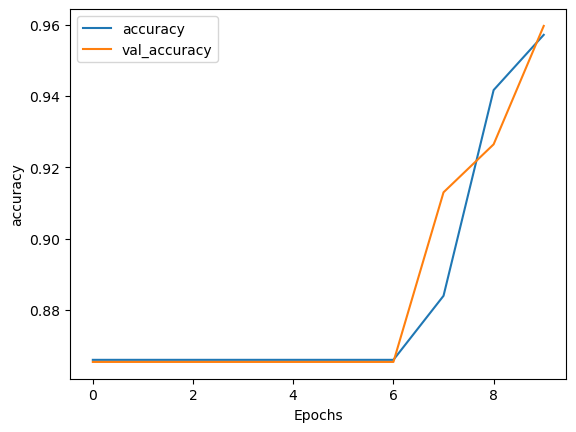

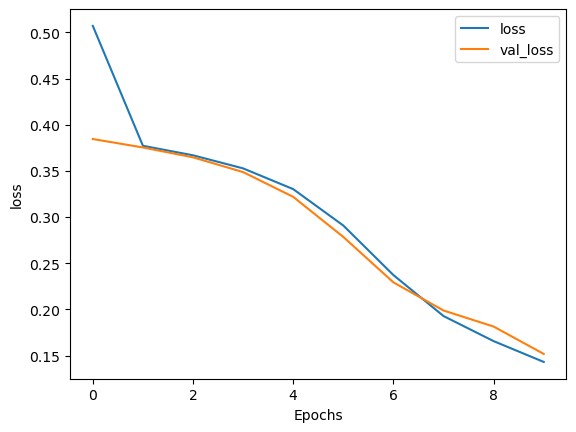

In [59]:
##plot the scores from history
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.legend([string, 'val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")